In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tqdm import tqdm_notebook

In [3]:
class SigmoidNeuron:
    
    def __init__(self):
        self.W = None
        self.B = None
        
    def perceptron(self,X):
        return np.dot(X,(self.W.T))+ self.B
        
    def sigmoid(self,x):
        return (1.0/(1.0+(np.exp(-(x)))))
    
    def grad_w(self,x,y):
        fx = self.sigmoid(self.perceptron(x))
        return (fx-y)*(1-fx)*(fx)*x
    
    def grad_b(self,x,y):
        fx = self.sigmoid(self.perceptron(x))
        return (fx-y)*(1-fx)*(fx)
    
    def predict(self,X):
            Y_pred =[]
            for x in X:
                y_p = self.sigmoid(self.perceptron(x))
                Y_pred.append(y_p)
            return np.array(Y_pred)
    
    def fit(self,X,Y,epochs=1,learning_rate=1,initialise=False,display_loss=False):
        if initialise:
            self.W = np.random.randn(1,X.shape[1])
            self.B=0
        
        if display_loss:
            loss={}
            
        for i in tqdm_notebook(range(epochs),total=epochs,unit="epoch"):
            dw=0
            db=0
            for x,y in zip(X,Y):
                dw+= self.grad_w(x,y)
                db+= self.grad_b(x,y)
            self.W -= learning_rate*dw
            self.B -= learning_rate*db
            
            if display_loss:
                Y_pred = self.sigmoid(self.perceptron(X))
                loss[i]=mean_squared_error(Y_pred,Y)
        if display_loss:
            plt.plot(list(loss.values()))
            plt.xlabel('Epochs')
            plt.ylabel('Mean Squared Error')
            plt.show()
        
  

# load data

In [4]:
data = pd.read_csv('mobile_cleaned.csv')

In [5]:
data.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,...,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,...,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,...,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,...,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,...,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,...,0,0,0,0,1,0,0,0,1,4.4


In [6]:
data.describe()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,...,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
count,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,...,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000
mean,232.970674,344.211144,5.462317,161.343109,11.120235,1.792551,72.353343,149.946394,46.369501,3191.307918,...,0.002933,0.055718,0.002933,0.759531,0.152493,0.085044,0.020528,0.020528,0.958944,4.072434
std,137.231746,88.161129,0.742529,22.305556,61.320855,0.451598,9.357839,9.192305,46.435453,932.533527,...,0.054153,0.229714,0.054153,0.427996,0.360026,0.279357,0.142006,0.142006,0.198711,0.377066
min,0.000000,143.000000,2.400000,58.000000,1.000000,1.000000,23.600000,115.600000,0.000000,1020.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000
25%,110.000000,282.000000,5.200000,150.000000,2.000000,1.400000,68.800000,146.200000,16.000000,2900.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.900000
50%,229.000000,326.000000,5.500000,161.000000,3.000000,1.800000,72.500000,151.300000,32.000000,3055.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.100000
75%,354.000000,403.000000,6.000000,172.000000,4.000000,2.200000,77.480000,156.200000,64.000000,3750.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.300000
max,472.000000,576.000000,6.590000,330.000000,512.000000,2.800000,87.660000,174.100000,512.000000,13000.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


In [7]:
data.shape

(341, 88)

In [8]:
Y=data['Rating']
X=data.drop('Rating',axis=1)


In [9]:
threshold=4.2
data['Class'] = (data['Rating']>=threshold).astype(np.int)

In [10]:
Y_binarised=data['Class'].values

In [11]:

x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=1,stratify=Y_binarised)

In [12]:
print(x_train.shape,x_test.shape)

(255, 87) (86, 87)


In [13]:
stdsc = StandardScaler()

In [14]:
x_train_scaled=stdsc.fit_transform(x_train)

In [15]:
x_test_scaled=stdsc.transform(x_test)

In [16]:
Y

0      4.5
1      4.5
2      4.4
3      4.3
4      4.4
      ... 
336    3.8
337    3.9
338    4.1
339    3.6
340    4.3
Name: Rating, Length: 341, dtype: float64

In [17]:
mms=MinMaxScaler()

In [18]:
y_train_scaled=mms.fit_transform(np.asarray(y_train).reshape(-1,1))
y_test_scaled=mms.fit_transform(np.asarray(y_test).reshape(-1,1))

In [19]:
mms.transform(np.asarray(y_test).reshape(-1,1))

array([[0.88888889],
       [0.72222222],
       [0.77777778],
       [0.33333333],
       [0.16666667],
       [0.88888889],
       [0.77777778],
       [0.55555556],
       [0.5       ],
       [0.61111111],
       [0.        ],
       [0.72222222],
       [0.66666667],
       [0.5       ],
       [0.66666667],
       [0.72222222],
       [0.77777778],
       [0.77777778],
       [0.44444444],
       [0.55555556],
       [0.66666667],
       [0.61111111],
       [0.61111111],
       [0.61111111],
       [0.61111111],
       [0.66666667],
       [0.66666667],
       [0.55555556],
       [0.72222222],
       [0.66666667],
       [0.22222222],
       [0.38888889],
       [0.38888889],
       [0.55555556],
       [0.27777778],
       [0.22222222],
       [0.55555556],
       [0.77777778],
       [0.77777778],
       [0.77777778],
       [0.72222222],
       [0.94444444],
       [0.55555556],
       [0.77777778],
       [0.72222222],
       [0.72222222],
       [0.83333333],
       [0.   

In [20]:
scaled_threshold=list(mms.transform(np.array([threshold]).reshape(-1,1)))[0][0]

In [21]:
scaled_threshold

0.6666666666666667

In [22]:
y_train_binarised = ((y_train_scaled>scaled_threshold).astype(np.int)).ravel()

In [23]:
y_test_binarised=((y_test_scaled>scaled_threshold).astype(np.int)).ravel()

# train on real data

In [24]:
sn=SigmoidNeuron()

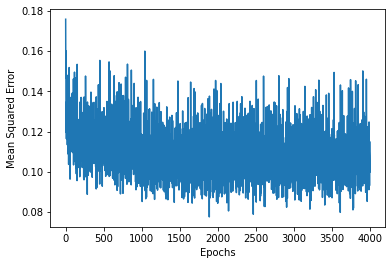

In [25]:
sn.fit(x_train_scaled,y_train_scaled,epochs=4000,learning_rate=0.5,initialise=True,display_loss=True)

In [26]:
y_pred_train = sn.predict(x_train_scaled)
y_pred_test = sn.predict(x_test_scaled
                        )

In [27]:
y_pred_train_binarised = ((y_pred_train>scaled_threshold).astype(np.int)).ravel()
y_pred_test_binarised = ((y_pred_test>scaled_threshold).astype(np.int)).ravel()

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_train=accuracy_score(y_pred_train_binarised,y_train_binarised)

In [30]:
accuracy_test=accuracy_score(y_pred_test_binarised,y_test_binarised)

In [31]:
print('train acc:',accuracy_train,'test acc:',accuracy_test)

train acc: 0.596078431372549 test acc: 0.5116279069767442


# exersices



1- Plot on a diffrent datasets
2- diffrent toy points
3- try diffrent hyperparameters
4- co-relate between (epachs,lr,mean square error, accuracy)

5-

In [32]:
y = []
for i in range(1,8):
    y.append(1/(2**i))

In [33]:
y.append(y[6])

In [34]:
y

[0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.0078125]

In [35]:
y_hat = y[::-1]

In [36]:
y_hat

[0.0078125, 0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5]

In [37]:
KLD = np.sum((y*np.log2(y))-np.sum(y*np.log2(y_hat)))

In [38]:
KLD

50.078125

Level 1 competition link: https://www.kaggle.com/t/bde616c5bf8c44d8bdae110ce541e8d5

Level 2 competiton link:  https://www.kaggle.com/t/5c12672a52bc4f1ab7e5e82a390af200

Level 3:  https://www.kaggle.com/t/657b2899610a45efbf46d8c3c8788be6

Level 4: https://www.kaggle.com/t/8036923f3f454b59beed0d83fdb8a3a3

Level 5: https://www.kaggle.com/t/474ddf8893fe4ed78a36ca21ae3c9e12

In [39]:
a=np.asarray([2.1,4.5,1.1])

In [40]:
def softmax(a):
    a_exp=np.exp(a)
    return (a_exp/(np.sum(a_exp)))

In [41]:
softmax(a)

array([0.08070337, 0.88960752, 0.02968911])

# FeedForward Neural Networks


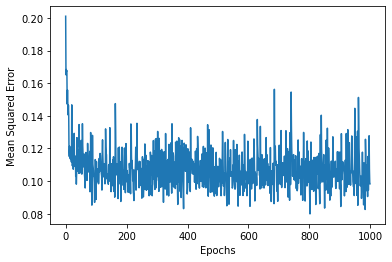

In [42]:
sn.fit(x_train_scaled,y_train_scaled,epochs=1000,learning_rate=0.5,initialise=True,display_loss=True)

In [43]:
[2,3]

[2, 3]

np.random.randn(10,11)

In [45]:
np.random.randn(10,11)

array([[ 1.94933339, -1.30417098, -1.81880896,  0.53527389, -1.5394997 ,
        -0.103272  , -0.24252529,  0.03487287, -2.52153605,  0.23302719,
         1.32740199],
       [-0.13548864,  0.03041621, -1.05966967, -0.49253219, -0.11273135,
        -1.06132292, -1.19707161, -1.56830716, -1.05575156,  1.02446516,
        -2.11799957],
       [ 1.96045483,  1.0361515 ,  0.50015935,  0.2440418 , -1.1349286 ,
        -0.52011339,  0.37503335, -0.56316568,  0.33156469,  0.48091167,
         1.09952407],
       [ 0.53887821, -0.85997804,  0.81424623, -0.69547873,  0.44091047,
         0.02210499, -1.25899196, -0.31780649, -0.57573059,  1.21228172,
         0.0391003 ],
       [ 1.68690359, -1.71041778, -0.01657126,  0.80001399, -0.341451  ,
        -0.12527723, -1.43106641,  1.74479733, -0.73306586,  1.85831228,
        -0.89281978],
       [-0.23572514,  0.83533612, -0.03627019,  0.02682085, -0.53790476,
        -0.43412162, -0.01139176,  0.58407119,  0.64493861,  0.2143251 ,
        -2.054

In [114]:
class FFN:
    def __init__(self, n_inputs,hidden_sizes=[2]):
        self.x = n_inputs
        self.ny=1
        self.nh = len(hidden_sizes)
        self.sizes = [self.nx]+hidden_sizes+[self.ny]
        
        self.W={}
        self.B={}
        
        for i in range(1,self.nh+1):
            self.W[i]= np.random.randn(self.sizes[i],self.sizes[i-1])
            self.B[i]=np.zeros((1,self.sizes[i]))
            
    def sigmoid(self,x):
        return 1.0/(1+np.exp(-x))
    
    def forward_pass(self,x):
        self.A={}
        self.H={}
        self.H[0]=x.reshape(1,-1)
        for i in range(1,nh+1):
            self.A[i]=(np.matmul(self.W[i],self.H[i-1])+(self.B[i])).ravel()
            self.H[i]=sigmoid(self.A[i])
        return self.H[self.nh+1]
            
        

In [135]:
Nn = 10
xn = 5

W = np.random.randn(10,5)
x=np.random.randn(xn)
b=np.random.randn(Nn)

In [136]:
W

array([[ 0.18413062, -0.27124752,  0.78141863, -0.00496622, -0.33495682],
       [-0.3030875 , -1.21652814, -0.69364647,  1.00952004, -0.01083892],
       [ 0.68278449, -0.92457124,  0.84520443, -0.86385712, -1.9210264 ],
       [ 1.1153649 ,  0.53736572,  0.88981697, -1.75262487, -0.47298262],
       [ 0.06406463, -0.65691405,  1.84828318,  0.79538745, -0.25183124],
       [-0.72586027, -0.26965093, -1.36698077,  0.44275925,  0.65423938],
       [-1.77318824,  0.25879723,  0.33862473, -0.43477531,  0.18070979],
       [-0.17424585, -0.42128983, -2.77949797,  1.25709607, -0.39201765],
       [ 1.44543017,  1.31692479, -0.9012063 , -2.60080946, -0.9657841 ],
       [ 0.2178857 ,  1.26420365, -1.72456529,  1.75507583, -0.20142165]])

In [137]:
x

array([ 1.98895885,  2.10298848, -1.78075315,  2.21873707, -1.40506212])

In [144]:
b

array([-1.47993151, -0.01278202,  0.80552251, -0.7346465 , -0.08513492,
        0.89145317, -0.34954394, -0.74236513,  0.13592075, -0.68741763])

In [146]:
np.dot(x,W[0])+b[0]

-2.6160309868286378

In [142]:
(np.matmul(W,x)+b).ravel()

array([-2.61603099,  0.31634676, -0.50342075, -2.19474588, -2.51193764,
        1.37804886, -5.15366239,  6.31467394,  2.97159981,  9.6526406 ])

In [151]:
(np.matmul(W,x)+b).ravel()

array([-2.61603099,  0.31634676, -0.50342075, -2.19474588, -2.51193764,
        1.37804886, -5.15366239,  6.31467394,  2.97159981,  9.6526406 ])